# Recolored Image Detection using CNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 166, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 248, 166, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 83, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 81, 32)       9248      
_________________________________________________________________
activation_7 (Activation)    (None, 122, 81, 32)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 40, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 59, 38, 64)        18496     
__________

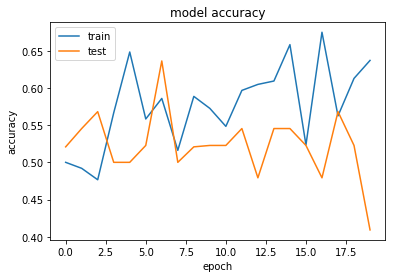

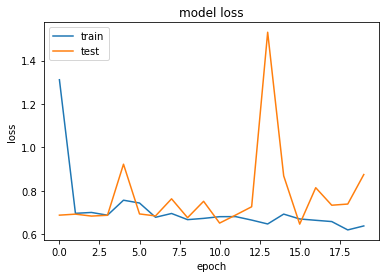

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import numpy

# dimensions of our images.
img_width, img_height = 250, 168

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 140
nb_validation_samples = 60
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.summary())


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    target_size=(img_width, 
                                                                 img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                                    validation_data_dir,
                                                    target_size=(img_width, 
                                                                 img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size)


#evaluate
score = model.evaluate_generator(validation_generator, 
                                 nb_validation_samples/batch_size)

scores = model.predict_generator(validation_generator, 
                                 nb_validation_samples/batch_size)

correct = 0
for i, n in enumerate(validation_generator.filenames):
    if n.startswith("org") and scores[i][0] <= 0.5:
        correct += 1
    if n.startswith("rec") and scores[i][0] > 0.5:
        correct += 1

print("Correct:", correct, " Total: ", len(validation_generator.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

# display history
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('recolored.h5')

In [ ]:
# Since the data set is very small and no. of epoch is also very less, 
# we are not getting a good accuracy.